In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 16

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# making datasets from pre-loaded .npy files
import numpy as np
from sklearn.utils import shuffle # for shuffling X and y in unison
# loading all available data
dataset_1 = np.load('/content/thumbs-up.npy') # contains images as np.array
dataset_1_labels = np.load('/content/thumbs-up_labels.npy') # contains labels
dataset_2 = np.load('/content/thumbs-down.npy')
dataset_2_labels = np.load('/content/thumbs-down_labels.npy')
X = np.concatenate((dataset_1, dataset_2))
y = np.concatenate((dataset_1_labels, dataset_2_labels))
X, y = shuffle(X, y, random_state=0)
print(X.shape, y.shape)
print(y[0:10])

In [0]:
# splitting data into test and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100,
                                                    random_state=42)

In [24]:
# making dataframe
import pandas as pd
df = pd.DataFrame.from_records(X)
df['labels'] = y
print(df.head())

     0    1    2    3    4    5  ...  49147  49148  49149  49150  49151       labels
0  255  255  255  255  255  255  ...    255    255    255    255    255    thumbs-up
1  206  206  206  255  255  255  ...    255    255    206    206    206    thumbs-up
2  255  255  255  255  255  255  ...    255    255    255    255    255    thumbs-up
3  255  255  255  255  255  255  ...    255    255    255    255    255  thumbs-down
4   75  196  216   76  197  217  ...    221    233    124    220    233  thumbs-down

[5 rows x 49153 columns]


In [7]:
# making ImageDataBunch object
path = Path('/content/drive/My Drive/classification_1/')
print('hello:\n', path.ls())
data = ImageList.from_folder(path=path, recurse=True)
data
# From what I found, storing the data in a particular folder structue
# gives the easiest way to load the data into a DataBunch object
# The folder structure is as folows
# main_folder
# ----------/Train_folder
# ----------------/class_1
# ----------------/class_2 
# .
# ----------/Validation_folder
# ---------------------------/class_1
# ---------------------------/class_2 
# ..
# Then we can simply get an ImageList object using from_folder() function
# recurse=True tells fastai to look recursively into the subfolders

hello:
 [PosixPath('/content/drive/My Drive/classification_1/Valid'), PosixPath('/content/drive/My Drive/classification_1/Train')]


ImageList (511 items)
Image (3, 800, 800),Image (3, 500, 500),Image (3, 350, 350),Image (3, 512, 512),Image (3, 500, 500)
Path: /content/drive/My Drive/classification_1

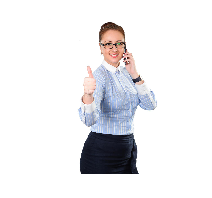

In [8]:
data[0].show() # All data loaded

In [0]:
data = data.split_by_folder(train='Train', valid='Valid')
# Once the data is loaded into an ImageList we can simply split 
# it using split_by_folder since we already stored the data in
# a particular way.

In [10]:
data

ItemLists;

Train: ImageList (460 items)
Image (3, 630, 630),Image (3, 500, 500),Image (3, 512, 512),Image (3, 400, 400),Image (3, 378, 378)
Path: /content/drive/My Drive/classification_1;

Valid: ImageList (51 items)
Image (3, 800, 800),Image (3, 500, 500),Image (3, 350, 350),Image (3, 512, 512),Image (3, 500, 500)
Path: /content/drive/My Drive/classification_1;

Test: None

In [0]:
data = data.label_from_folder()
# Now it's time to label our data and again the directory structure
# comes in handy and we can do by making a simple call to label_from_folder()
# This gives a LabelList

In [12]:
data

LabelLists;

Train: LabelList (460 items)
x: ImageList
Image (3, 630, 630),Image (3, 500, 500),Image (3, 512, 512),Image (3, 400, 400),Image (3, 378, 378)
y: CategoryList
thumbs-up,thumbs-up,thumbs-up,thumbs-up,thumbs-up
Path: /content/drive/My Drive/classification_1;

Valid: LabelList (51 items)
x: ImageList
Image (3, 800, 800),Image (3, 500, 500),Image (3, 350, 350),Image (3, 512, 512),Image (3, 500, 500)
y: CategoryList
thumbs-up,thumbs-up,thumbs-up,thumbs-up,thumbs-up
Path: /content/drive/My Drive/classification_1;

Test: None

thumbs-up torch.Size([3, 440, 440])


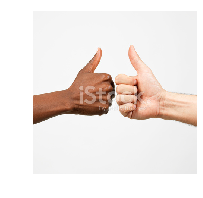

In [13]:
# Getting a random sample from train part of LabelList
X_sample, y_sample = data.train[80]
X_sample.show()
print(y_sample, X_sample.shape)

In [0]:
tfms = get_transforms()
data = data.transform(tfms, size=224)
# Here we applied the defualt transformations to the dataset.
# get_transforms() will fetch all default transforms
# we can also write our own tranformation in a function and pass
# that function to .transform() instead
# The size in .trainsform() tells the API to convert all
# images to same size. This is important for normalization

In [0]:
data = data.databunch(bs=bs).normalize()
# finally get the databunch and normalize the data

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f8fd80effd0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


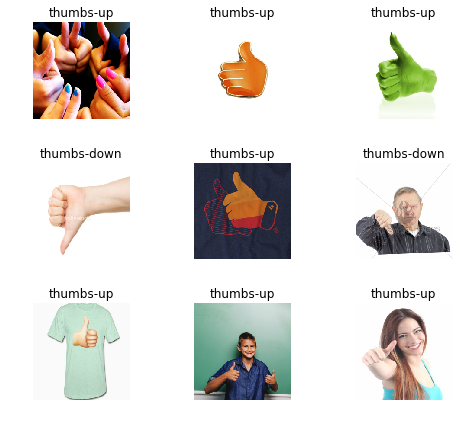

In [104]:
data.show_batch(rows=3, figsize=(7, 6))

In [16]:
print(data.classes)

['thumbs-down', 'thumbs-up']


In [17]:
# model training
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 22099806.62it/s]


In [18]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.766096,0.361617,0.176471,01:24
1,0.639757,0.300609,0.117647,00:11
2,0.517255,0.219726,0.098039,00:10
3,0.401357,0.194820,0.098039,00:10


In [0]:
learn.save('Stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [22]:
losses, idx = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idx)

True

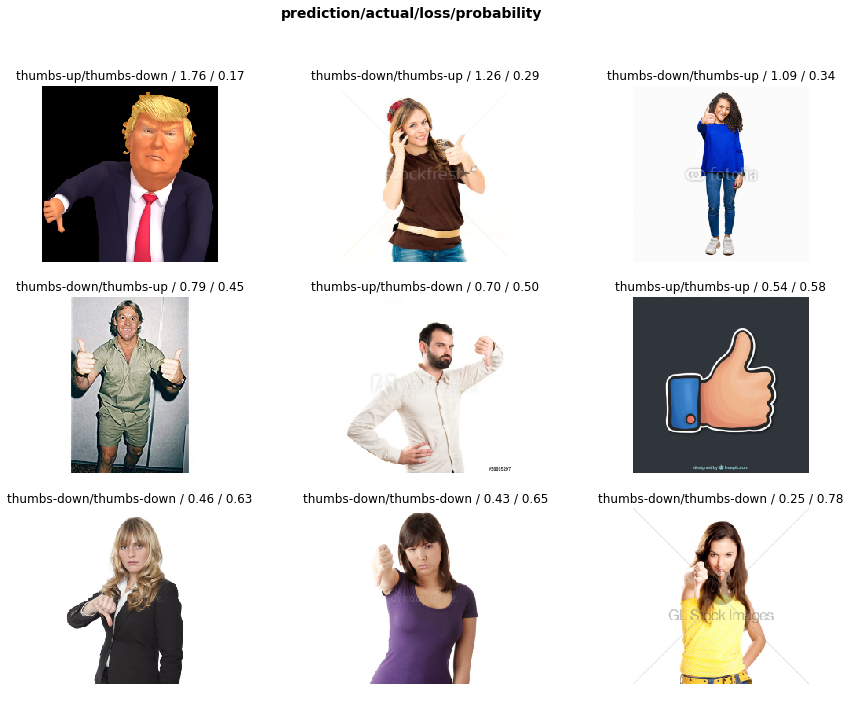

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

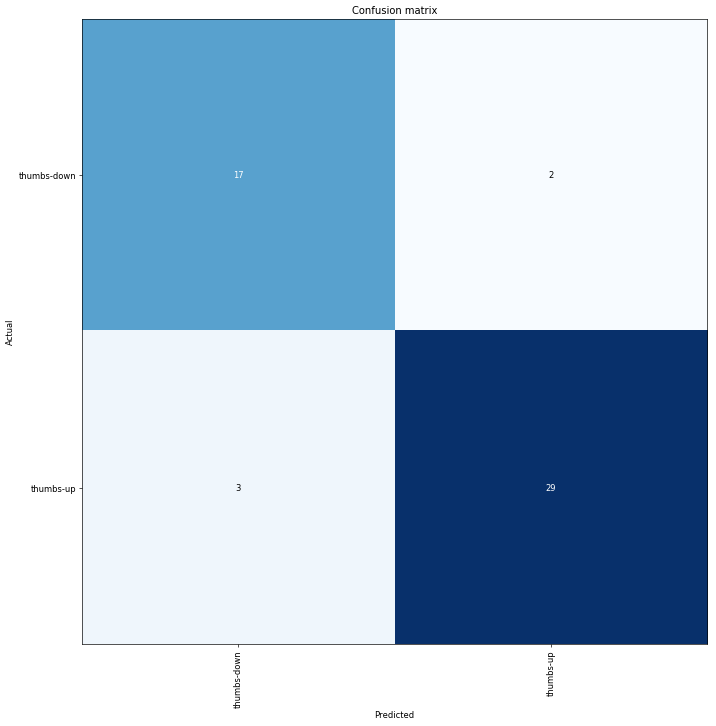

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('thumbs-up', 'thumbs-down', 3), ('thumbs-down', 'thumbs-up', 2)]

In [0]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.454019,0.174265,0.058824,00:10


In [30]:
learn.load('Stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (460 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
thumbs-up,thumbs-up,thumbs-up,thumbs-up,thumbs-up
Path: /content/drive/My Drive/classification_1;

Valid: LabelList (51 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
thumbs-up,thumbs-up,thumbs-up,thumbs-up,thumbs-up
Path: /content/drive/My Drive/classification_1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1),

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


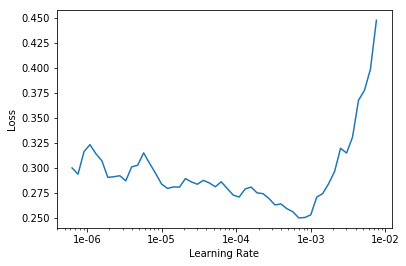

In [32]:
learn.recorder.plot()

In [33]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.331615,0.746434,0.176471,00:10
1,0.244117,0.043204,0.000000,00:10
